
[1/6] Loading and preprocessing dataset...

Dataset sample:
             Domain  Have_IP  Have_At  URL_Length  URL_Depth  Redirection  \
0  graphicriver.net        0        0           1          1            0   
1         ecnavi.jp        0        0           1          1            1   
2      hubpages.com        0        0           1          1            0   
3   extratorrent.cc        0        0           1          3            0   
4     icicibank.com        0        0           1          3            0   

   https_Domain  TinyURL  Prefix/Suffix  DNS_Record  Web_Traffic  Domain_Age  \
0             0        0              0           0            1           1   
1             0        0              0           0            1           1   
2             0        0              0           0            1           0   
3             0        0              0           0            1           0   
4             0        0              0           0            1           0

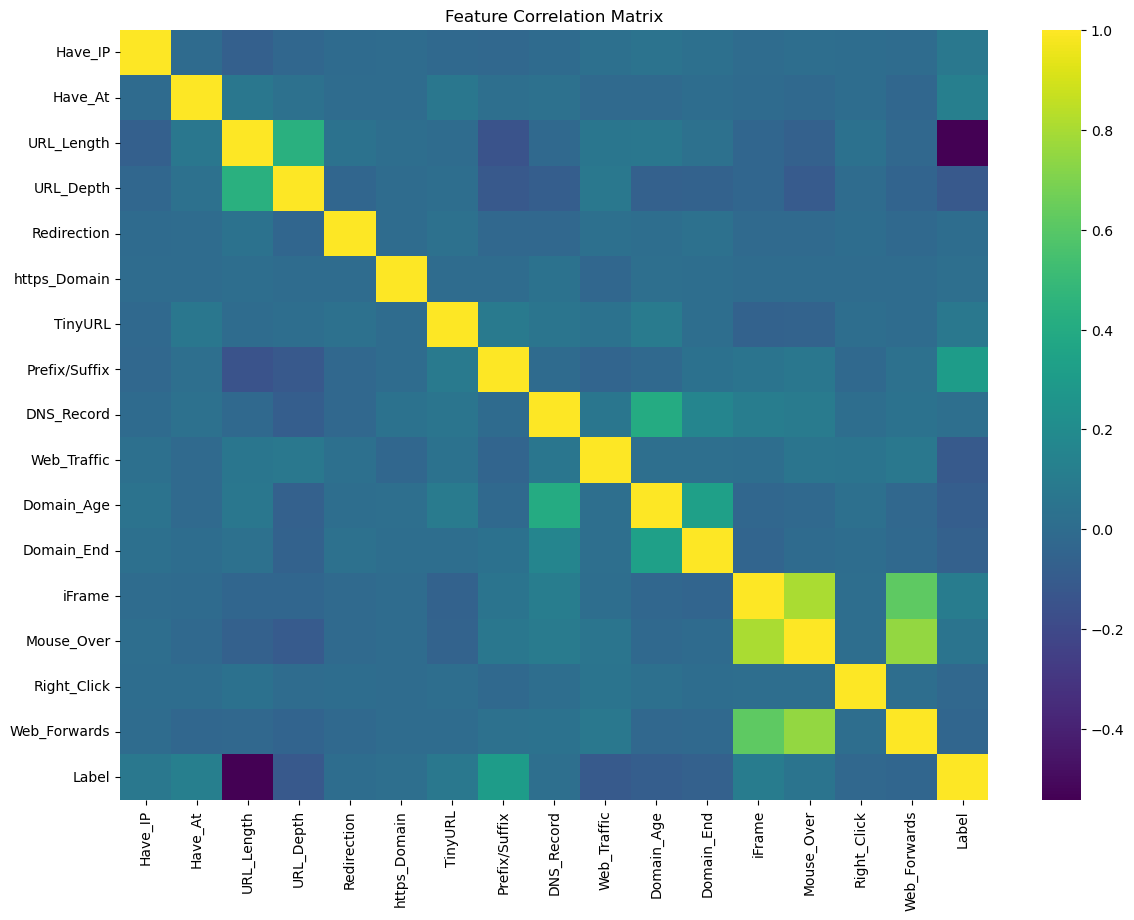


[3/6] Preparing training data...

[4/6] Training machine learning models...

Training Decision Tree...
Decision Tree Training Accuracy: 82.21%
Decision Tree Validation Accuracy: 81.90%

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1000
           1       0.99      0.64      0.78      1000

    accuracy                           0.82      2000
   macro avg       0.86      0.82      0.81      2000
weighted avg       0.86      0.82      0.81      2000



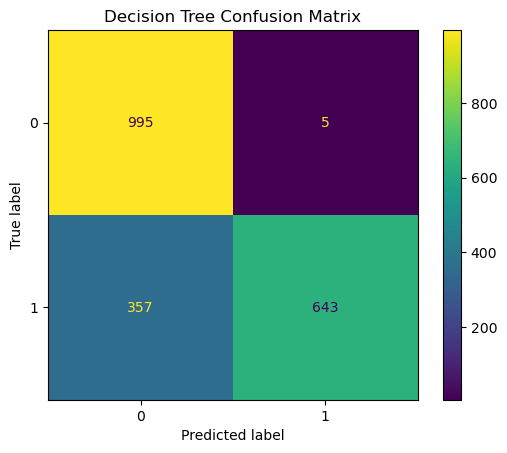


Training Random Forest...
Random Forest Training Accuracy: 83.53%
Random Forest Validation Accuracy: 83.85%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1000
           1       0.99      0.68      0.81      1000

    accuracy                           0.84      2000
   macro avg       0.88      0.84      0.83      2000
weighted avg       0.88      0.84      0.83      2000



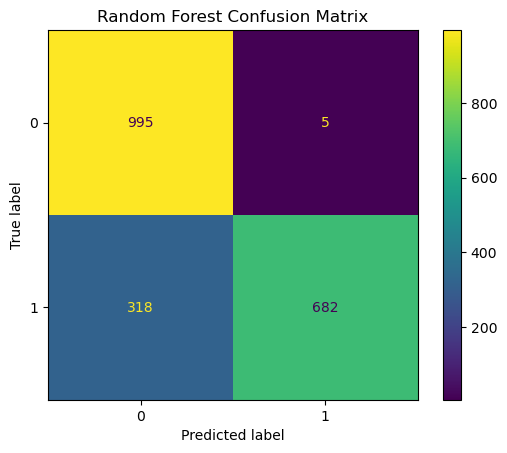


Training Multilayer Perceptron...
Multilayer Perceptron Training Accuracy: 85.62%
Multilayer Perceptron Validation Accuracy: 87.20%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1000
           1       0.95      0.78      0.86      1000

    accuracy                           0.87      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.87      0.87      2000



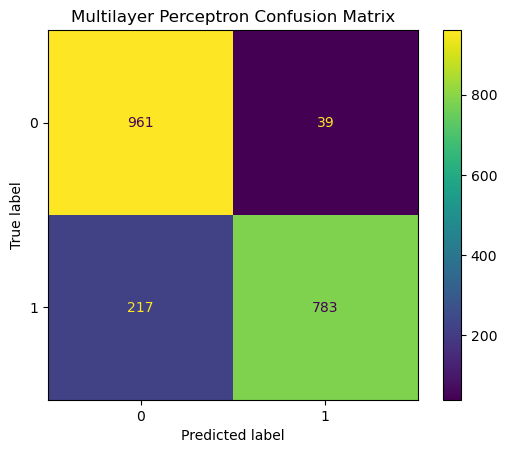


Training XGBoost...
XGBoost Training Accuracy: 86.51%
XGBoost Validation Accuracy: 87.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1000
           1       0.92      0.81      0.86      1000

    accuracy                           0.87      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.87      0.87      2000



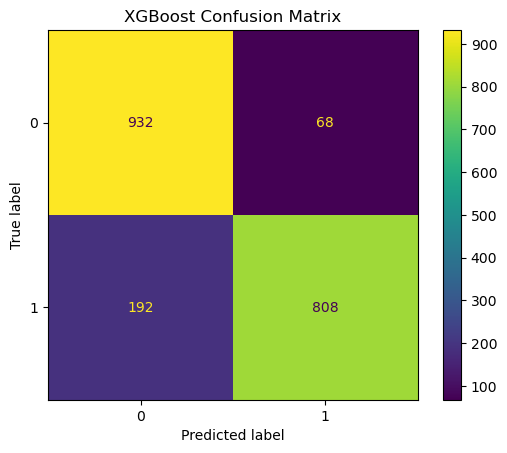


Training Support Vector Machine...
Support Vector Machine Training Accuracy: 83.38%
Support Vector Machine Validation Accuracy: 83.60%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1000
           1       0.98      0.69      0.81      1000

    accuracy                           0.84      2000
   macro avg       0.87      0.84      0.83      2000
weighted avg       0.87      0.84      0.83      2000



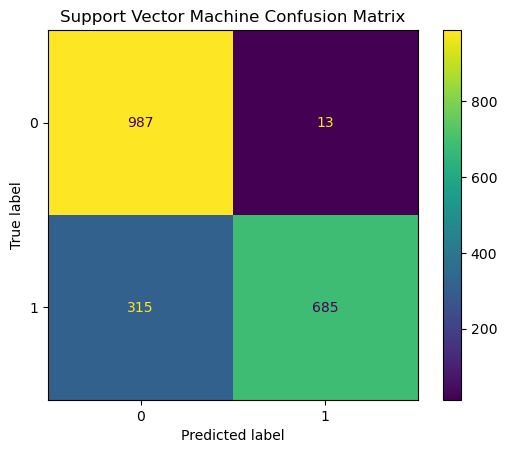


[5/6] Training autoencoder feature extractor...
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Autoencoder Feature Classifier Accuracy: 79.90%

[6/6] Generating performance report...

Model Performance Summary:
                            Model  Validation Accuracy
2           Multilayer Perceptron               0.8720
3                         XGBoost               0.8700
1                   Random Forest               0.8385
4          Support Vector Machine               0.8360
0                   Decision Tree               0.8190
5  Autoencoder+LogisticRegression               0.7990


c:\Users\ranan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


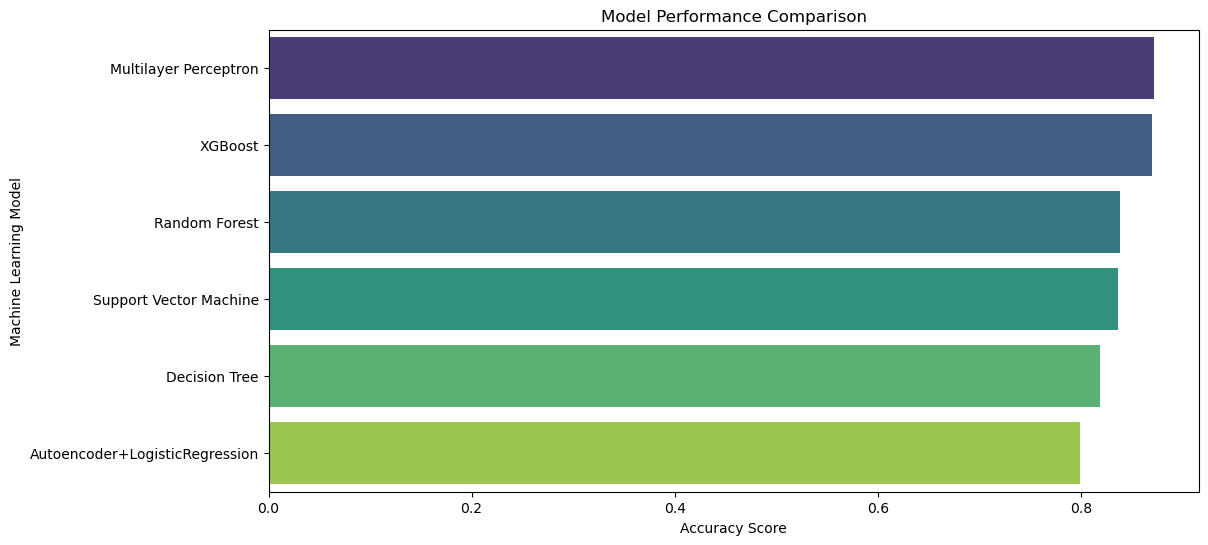


Optimal model selected for deployment: Multilayer Perceptron
Note: While XGBoost generally offers strong performance, final model selection should consider computational requirements and interpretability needs


In [2]:
"""
Phishing URL Detection Model Training Script
Author: Rananjay Singh Chauhan, Granth Satsangi
Description: Comparative analysis of machine learning models for phishing URL detection
"""

# ==================== Imports ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix, ConfusionMatrixDisplay)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from keras.models import Model
from keras.layers import Input, Dense
import joblib

# ==================== Data Loading & Preparation ====================
print("\n[1/6] Loading and preprocessing dataset...")
phishing_data = pd.read_csv(r"C:\Users\ranan\OneDrive\Documents\Phishing app\Datasets\URL\urldata.csv")

# Initial dataset inspection
print("\nDataset sample:")
print(phishing_data.head())

# Feature engineering
print("\nRemoving domain column...")
processed_data = phishing_data.drop('Domain', axis=1)

# ==================== Exploratory Data Analysis ====================
print("\n[2/6] Performing exploratory analysis...")
plt.figure(figsize=(14,10))
sns.heatmap(processed_data.corr(), cmap='viridis', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

# ==================== Data Splitting & Normalization ====================
print("\n[3/6] Preparing training data...")
target = processed_data['Label']
features = processed_data.drop('Label', axis=1)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==================== Model Training Framework ====================
model_registry = {}
performance_metrics = {}

def train_model(model_name, model, use_scaling=True):
    print(f"\nTraining {model_name}...")
    X_tr = X_train_scaled if use_scaling else X_train
    X_te = X_test_scaled if use_scaling else X_test
    
    model.fit(X_tr, y_train)
    
    # Performance evaluation
    train_acc = model.score(X_tr, y_train)
    test_acc = model.score(X_te, y_test)
    print(f"{model_name} Training Accuracy: {train_acc:.2%}")
    print(f"{model_name} Validation Accuracy: {test_acc:.2%}")
    
    # Detailed evaluation
    y_pred = model.predict(X_te)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    
    model_registry[model_name] = model
    performance_metrics[model_name] = test_acc
    return test_acc

# ==================== Model Training Execution ====================
print("\n[4/6] Training machine learning models...")

# Decision Tree
dt_params = {'max_depth': 7, 'min_samples_split': 5}
dt_score = train_model("Decision Tree", 
                      DecisionTreeClassifier(**dt_params), False)

# Random Forest
rf_score = train_model("Random Forest", 
                      RandomForestClassifier(n_estimators=100, max_depth=9), False)

# Neural Network
nn_score = train_model("Multilayer Perceptron", 
                      MLPClassifier(hidden_layer_sizes=(128, 64, 32), 
                                   alpha=0.001, early_stopping=True))

# XGBoost
xgb_score = train_model("XGBoost", 
                       XGBClassifier(learning_rate=0.3, max_depth=6, 
                                    n_estimators=150))

# Support Vector Machine
svm_score = train_model("Support Vector Machine", 
                       SVC(C=1.5, kernel='rbf', probability=True))

# ==================== Autoencoder Feature Learning ====================
print("\n[5/6] Training autoencoder feature extractor...")

# Data normalization for autoencoder
ae_scaler = MinMaxScaler()
X_ae_train = ae_scaler.fit_transform(X_train)
X_ae_test = ae_scaler.transform(X_test)

# Autoencoder architecture
input_dim = X_ae_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation="relu")(input_layer)
encoder = Dense(64, activation="relu")(encoder)
code_layer = Dense(32, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(code_layer)
decoder = Dense(128, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Model training
autoencoder.fit(X_ae_train, X_ae_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(X_ae_test, X_ae_test),
                verbose=0)

# Feature extraction
encoder_model = Model(inputs=input_layer, outputs=code_layer)
X_train_encoded = encoder_model.predict(X_ae_train)
X_test_encoded = encoder_model.predict(X_ae_test)

# Classifier training on encoded features
from sklearn.linear_model import LogisticRegression
ae_classifier = LogisticRegression(C=0.8)
ae_classifier.fit(X_train_encoded, y_train)
ae_score = ae_classifier.score(X_test_encoded, y_test)
print(f"\nAutoencoder Feature Classifier Accuracy: {ae_score:.2%}")
performance_metrics["Autoencoder+LogisticRegression"] = ae_score

# ==================== Results Analysis ====================
print("\n[6/6] Generating performance report...")

# Comparative analysis
performance_df = pd.DataFrame({
    'Model': list(performance_metrics.keys()),
    'Validation Accuracy': list(performance_metrics.values())
}).sort_values('Validation Accuracy', ascending=False)

print("\nModel Performance Summary:")
print(performance_df)

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x='Validation Accuracy', y='Model', data=performance_df, palette='viridis')
plt.title("Model Performance Comparison")
plt.xlabel("Accuracy Score")
plt.ylabel("Machine Learning Model")
plt.show()

# Model deployment
best_model_name = performance_df.iloc[0]['Model']
print(f"\nOptimal model selected for deployment: {best_model_name}")

if 'XGBoost' in best_model_name:
    joblib.dump(model_registry[best_model_name], 'production_model.pkl')
    print("XGBoost model exported for production use")
else:
    print("Note: While XGBoost generally offers strong performance, final model selection should consider computational requirements and interpretability needs")

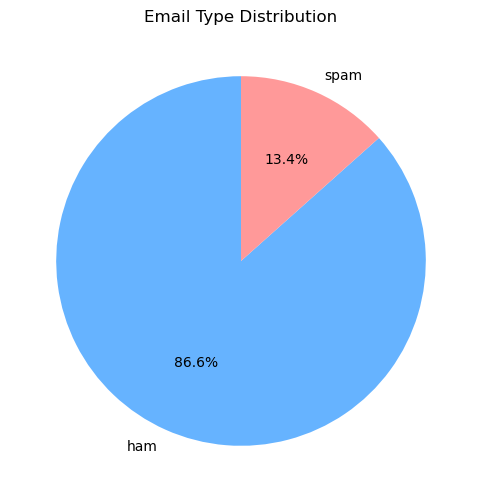

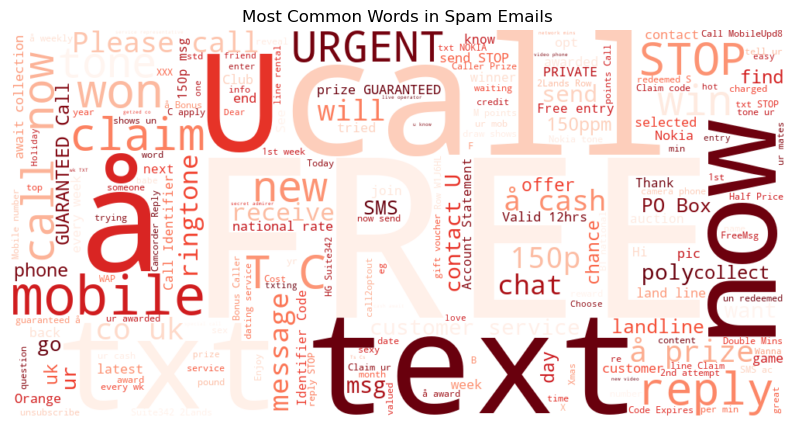

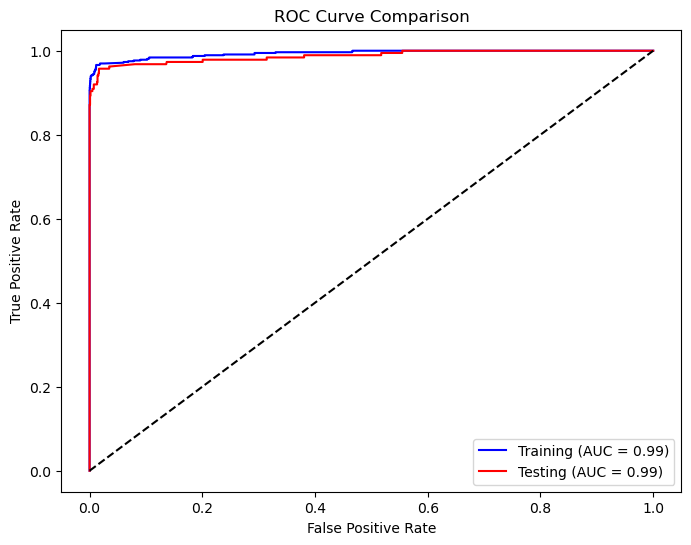

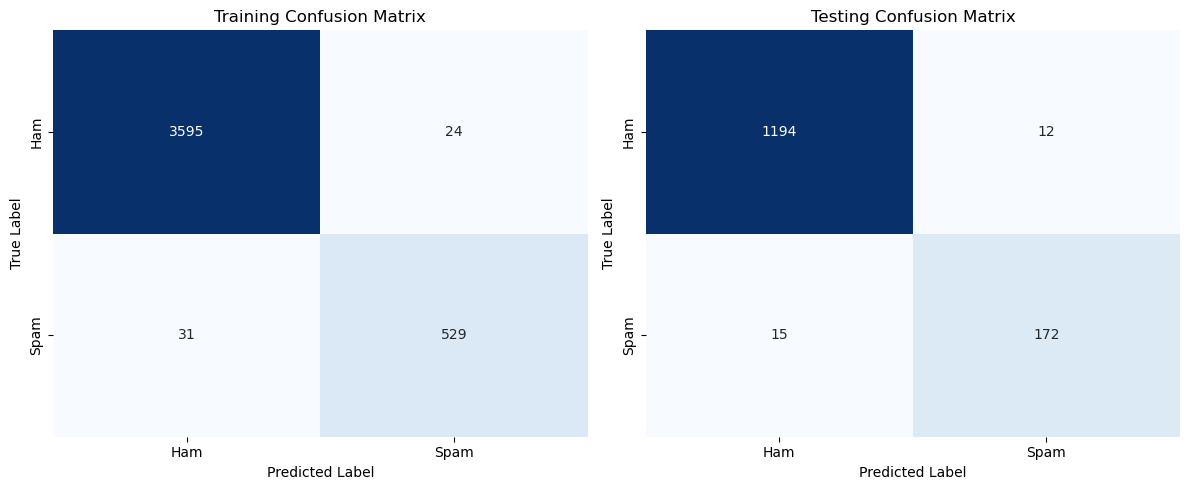


Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3619
           1       0.96      0.94      0.95       560

    accuracy                           0.99      4179
   macro avg       0.97      0.97      0.97      4179
weighted avg       0.99      0.99      0.99      4179


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1206
           1       0.93      0.92      0.93       187

    accuracy                           0.98      1393
   macro avg       0.96      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393


Spam Detection Results:

Email: Congratulations! You've won a $1000 prize! Click h...
Prediction: Spam
Confidence: 100.00%
Spam Probability: 100.00%

Email: Meeting reminder: Tomorrow at 2 PM in conference r...
Prediction: Ham
Confidence: 100.00%
Spam Probability: 0.00%

Email: Y

In [3]:
"""
Phishing Email Detection Model Training Script
Author: Rananjay Singh Chauhan, Granth Satsangi
Description: Comparative analysis of machine learning models for phishing URL detection
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                            recall_score, f1_score, roc_auc_score, roc_curve, 
                            classification_report)
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load the dataset with proper path formatting
try:
    df = pd.read_csv(r"C:\Users\ranan\OneDrive\Documents\Phishing app\Datasets\URL\spamemail.csv", encoding='ISO-8859-1')
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Clean and prepare data
def clean_data(df):
    """Clean and preprocess the dataset"""
    # Remove unnamed columns if they exist
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    
    # Rename columns for consistency
    df = df.rename(columns={'v1': 'Type', 'v2': 'Message'})
    
    # Create binary spam column
    df['Spam'] = df['Type'].map({'ham': 0, 'spam': 1})
    return df

df = clean_data(df)

# Visualization functions
def plot_distribution(df):
    """Plot class distribution"""
    plt.figure(figsize=(6,6))
    counts = df['Type'].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', 
            colors=['#66b3ff', '#ff9999'], startangle=90)
    plt.title('Email Type Distribution')
    plt.show()

def plot_wordcloud(df, text_column, title):
    """Generate word cloud visualization"""
    text = ' '.join(df[text_column].astype(str))
    
    wordcloud = WordCloud(width=1000, height=500,
                        background_color='white',
                        max_words=200,
                        colormap='Reds').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Data visualization
plot_distribution(df)
plot_wordcloud(df[df['Spam'] == 1], 'Message', 'Most Common Words in Spam Emails')

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    df['Message'], 
    df['Spam'],
    test_size=0.25,
    random_state=42,
    stratify=df['Spam']
)

# Enhanced model evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Comprehensive model evaluation with proper validation"""
    # Train model
    model.fit(X_train, y_train)
    
    # Generate predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Probability estimates
    proba_train = model.predict_proba(X_train)[:, 1]
    proba_test = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_precision': precision_score(y_train, y_pred_train),
        'test_precision': precision_score(y_test, y_pred_test),
        'train_recall': recall_score(y_train, y_pred_train),
        'test_recall': recall_score(y_test, y_pred_test),
        'train_f1': f1_score(y_train, y_pred_train),
        'test_f1': f1_score(y_test, y_pred_test),
        'train_roc_auc': roc_auc_score(y_train, proba_train),
        'test_roc_auc': roc_auc_score(y_test, proba_test)
    }
    
    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    for data, color, label in zip(
        [(y_train, proba_train), (y_test, proba_test)],
        ['blue', 'red'],
        ['Training', 'Testing']
    ):
        fpr, tpr, _ = roc_curve(data[0], data[1])
        plt.plot(fpr, tpr, color=color, 
                label=f'{label} (AUC = {roc_auc_score(data[0], data[1]):.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()
    plt.show()
    
    # Confusion matrices
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    for idx, (y_true, y_pred, title) in enumerate(zip(
        [y_train, y_test],
        [y_pred_train, y_pred_test],
        ['Training', 'Testing']
    )):
        sns.heatmap(confusion_matrix(y_true, y_pred),
                   annot=True, fmt='d', cmap='Blues',
                   ax=ax[idx], cbar=False)
        ax[idx].set_title(f'{title} Confusion Matrix')
        ax[idx].set_xlabel('Predicted Label')
        ax[idx].set_ylabel('True Label')
        ax[idx].set_xticklabels(['Ham', 'Spam'])
        ax[idx].set_yticklabels(['Ham', 'Spam'])
    
    plt.tight_layout()
    plt.show()
    
    # Classification reports
    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_pred_train))
    
    print("\nTesting Classification Report:")
    print(classification_report(y_test, y_pred_test))
    
    return metrics

# Create and evaluate model pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=1000, stop_words='english')),
    ('classifier', MultinomialNB(alpha=0.1))
])

metrics = evaluate_model(pipeline, X_train, X_test, y_train, y_test)

# Enhanced spam detection function
class SpamDetector:
    def __init__(self, model):
        self.model = model
        
    def predict(self, email_text):
        """Make prediction with confidence score"""
        prediction = self.model.predict([email_text])[0]
        proba = self.model.predict_proba([email_text])[0]
        
        return {
            'prediction': 'Spam' if prediction == 1 else 'Ham',
            'confidence': max(proba),
            'spam_probability': proba[1]
        }

# Initialize detector with trained model
detector = SpamDetector(pipeline)

# Example usage
test_emails = [
    "Congratulations! You've won a $1000 prize! Click here to claim!",
    "Meeting reminder: Tomorrow at 2 PM in conference room",
    "Your account needs verification. Please update your details"
]

print("\nSpam Detection Results:")
for email in test_emails:
    result = detector.predict(email)
    print(f"\nEmail: {email[:50]}...")
    print(f"Prediction: {result['prediction']}")
    print(f"Confidence: {result['confidence']:.2%}")
    print(f"Spam Probability: {result['spam_probability']:.2%}")


In [3]:
# generate_scaler.py
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# Load your dataset (update path to match your CSV location)
dataset_path = r"C:\Users\ranan\OneDrive\Documents\Phishing app\Datasets\URL\urldata.csv"  # Update this path
phishing_data = pd.read_csv(dataset_path, encoding='ISO-8859-1')

# Preprocess data (same as in training)
processed_data = phishing_data.drop('Domain', axis=1)
target = processed_data['Label']
features = processed_data.drop('Label', axis=1)

# Create train/test split (same parameters as original training)
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    target, 
    test_size=0.2, 
    random_state=42, 
    stratify=target
)

# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(X_train)  # Only fit on training data

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Scaler successfully created and saved as scaler.pkl")

Scaler successfully created and saved as scaler.pkl
